In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
sns.set()
df = pd.read_excel("data/Realized Schedule.xlsx")
df_test = pd.read_excel("data/Future Schedule.xlsx")

df = df.drop(['FlightNumber','AircraftType'], axis = 1)
df_test = df_test.drop(['FlightNumber', 'AircraftType'], axis = 1)

df["Weekday"] = df.ScheduleTime.dt.weekday

df_test["Weekday"] = df_test.ScheduleTime.dt.weekday
# df["Hour"]    = df.ScheduleTime.dt.hour

# df['Time'] = (df.ScheduleTime - df.ScheduleTime[0]) / pd.Timedelta('1 hour')
# df.Time = (df.Time - df.Time.min())/(df.Time.max() - df.Time.min())
df

,ScheduleTime,Airline,Destination,FlightType,Sector,SeatCapacity,LoadFactor,Weekday
0,2021-01-01 06:35:00,IA,DEN,J,US,142,0.408451,4
1,2021-01-01 10:35:00,JZ,YHM,J,CA,74,0.189189,4
2,2021-01-01 12:05:00,IA,DEN,J,US,142,0.570423,4
3,2021-01-01 13:20:00,CN,EST,J,US,72,0.333333,4
4,2021-01-01 14:20:00,LJ,DEN,J,US,186,0.204301,4
...,...,...,...,...,...,...,...,...
39444,2022-02-28 18:45:00,VW,YYZ,J,CA,144,0.847222,0
39445,2022-02-28 19:25:00,LJ,YDQ,J,CA,156,0.871795,0
39446,2022-02-28 20:00:00,VW,MYV,J,US,98,0.857143,0
39447,2022-02-28 19:30:00,LJ,RUT,J,US,186,0.682796,0


In [59]:
def get_data(df,  *args):
    if args is not None:
        X = pd.get_dummies(df.drop(list(args), axis = 1))
    else:
        X = pd.get_dummies(df)
    
    split_date = '2022-02-01'

    X_train = X[X.ScheduleTime < split_date].drop(["ScheduleTime","LoadFactor"], axis = 1)
    X_val   = X[X.ScheduleTime >= split_date].drop(["ScheduleTime","LoadFactor"], axis = 1)

    y_train = X[X.ScheduleTime < split_date].LoadFactor
    y_val   = X[X.ScheduleTime >= split_date].LoadFactor

    return X_train, y_train, X_val, y_val

X_test = pd.get_dummies(df_test).drop(["ScheduleTime"], axis = 1)

X_train, y_train, X_val, y_val = get_data(df)
X_train



,SeatCapacity,Weekday,Airline_5M,Airline_AY,Airline_BJ,Airline_BT,Airline_BZ,Airline_CD,Airline_CL,Airline_CN,...,Sector_CN,Sector_DK,Sector_EG,Sector_IQ,Sector_IS,Sector_MX,Sector_NL,Sector_QA,Sector_SG,Sector_US
0,142,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,74,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,142,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,72,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,186,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36486,98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36487,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36488,189,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
36489,156,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

0.99 ** X_train.index.values[::-1]

100%|██████████| 10/10 [00:24<00:00,  2.47s/it]


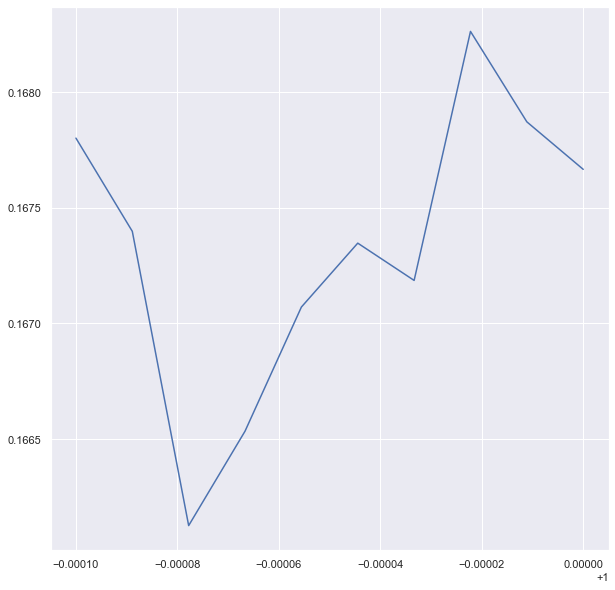

In [56]:
N = 10
lambdas = np.linspace(0.9999,1,N)
errors  = np.zeros(N)
for i in tqdm(range(N)):
    X_train, y_train, X_val, y_val = get_data(df)
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train, sample_weight = lambdas[i]**X_train.index.values[::-1])
    y_hat = tree.predict(X_val)
    errors[i] = abs(y_val - y_hat).mean()

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(lambdas, errors)

44999.99999993001

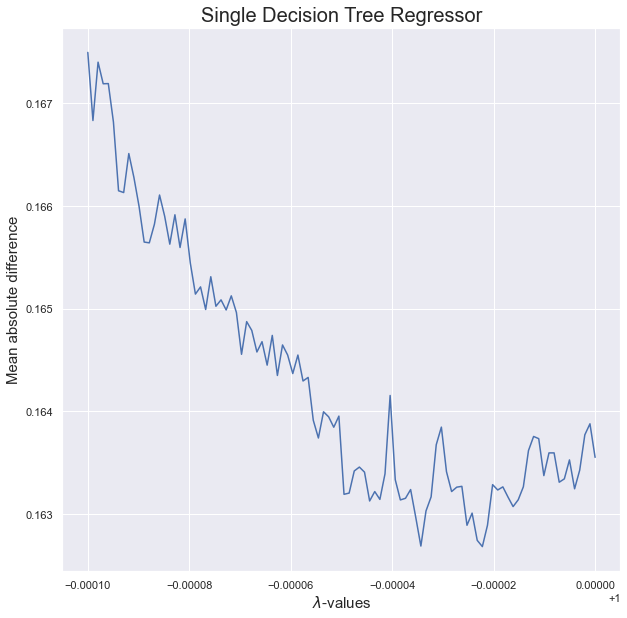

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(lambdas, errors)
ax.set_xlabel(r"$\lambda$-values", fontsize = 15)
ax.set_ylabel("Mean absolute difference", fontsize = 15)
ax.set_title("Single Decision Tree Regressor", fontsize = 20);
L = lambdas[errors.argmin()]


# Random Forest


In [47]:
from sklearn.ensemble import RandomForestRegressor
L = lambdas[errors.argmin()] # 0.9998585858585859
X_train, y_train, X_val, y_val = get_data(df)
weights = L**X_train.index.values[::-1]


model = RandomForestRegressor()
model.fit(X_train, y_train, weights)


RandomForestRegressor()

In [57]:
abs(model.predict(X_val) - y_val).mean()


c:\Users\peter\OneDrive - Danmarks Tekniske Universitet\DTU\8. Semester\02582-Computational_Data_Analysis\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AircraftType_221
- AircraftType_223
- AircraftType_295
- AircraftType_318
- AircraftType_319
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 411 features, but RandomForestRegressor is expecting 352 features as input.

# Old stuff


100it [01:33,  1.07it/s]


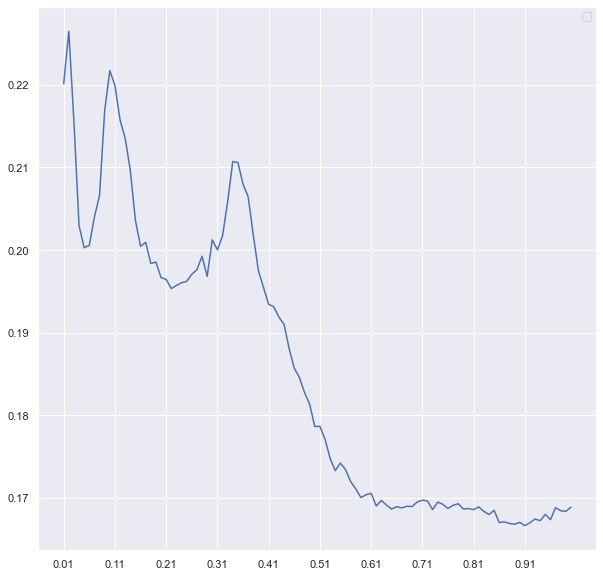

In [29]:
vars = []
M = len(vars)
K = 100
P = np.linspace(0.01,1, K)
N = len(X_train)
errors = np.zeros(K)

X_train, y_train, X_val, y_val = get_data(df)
for i, p in tqdm(enumerate(P)):
    tree = DecisionTreeRegressor()
    tree.fit(X_train.iloc[-int(N * p):,:], y_train.iloc[-int(N * p):])

    y_hat = tree.predict(X_val)
    err   = abs(y_hat - y_val).mean()
    errors[i] = err

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(errors.T)
x_ticks = range(0, K, int(K/10))
ax.set_xticks(x_ticks)
ax.set_xticklabels(np.round(P[x_ticks],2));
ax.legend(vars)

10it [00:02,  3.65it/s]
10it [00:08,  1.20it/s]
10it [00:10,  1.01s/it]
10it [00:10,  1.09s/it]
10it [00:08,  1.19it/s]


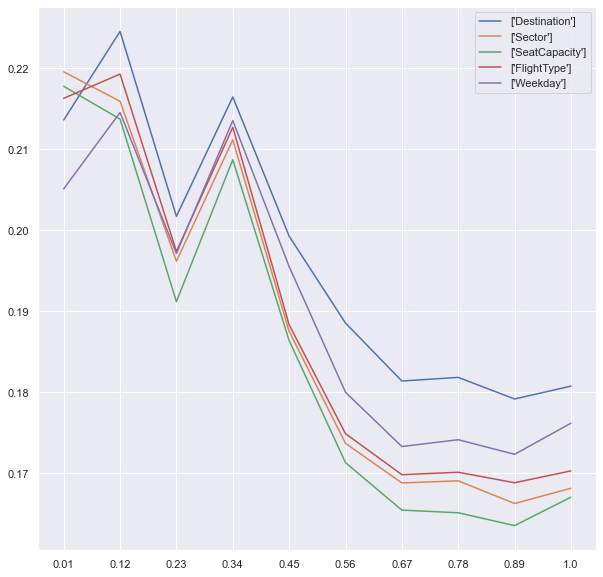

In [41]:
vars = [ ["Destination"], ["Sector"], ["SeatCapacity"], ["FlightType"],["Weekday"]]
M = len(vars)
K = 10
P = np.linspace(0.01,1, K)
N = len(X_train)
errors = np.zeros((M, K))
for j in range(M):
    X_train, y_train, X_val, y_val = get_data(df,  *vars[j])
    for i, p in tqdm(enumerate(P)):
        tree = DecisionTreeRegressor()
        tree.fit(X_train.iloc[-int(N * p):,:], y_train.iloc[-int(N * p):])

        y_hat = tree.predict(X_val)
        err   = abs(y_hat - y_val).mean()
        errors[j,i] = err

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(errors.T)
x_ticks = range(0, K, int(K/10))
ax.set_xticks(x_ticks)
ax.set_xticklabels(np.round(P[x_ticks],2));
ax.legend(vars)

10it [00:10,  1.07s/it]
10it [00:02,  4.39it/s]
10it [00:10,  1.08s/it]
10it [00:08,  1.17it/s]
10it [00:12,  1.25s/it]


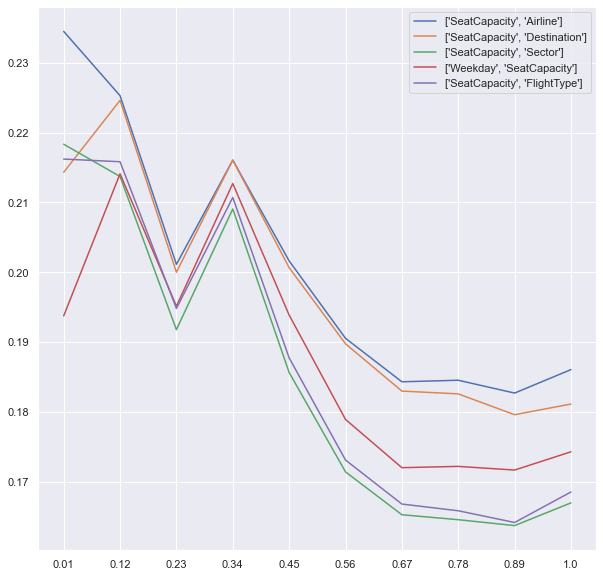

In [42]:
vars = [["SeatCapacity","Airline"], ["SeatCapacity","Destination"], ["SeatCapacity","Sector"], ["Weekday","SeatCapacity"],  ["SeatCapacity","FlightType"]]
M = len(vars)
K = 10
P = np.linspace(0.01,1, K)
N = len(X_train)
errors = np.zeros((M, K))
for j in range(M):
    X_train, y_train, X_val, y_val = get_data(df, *vars[j])
    for i, p in tqdm(enumerate(P)):
        tree = DecisionTreeRegressor()
        tree.fit(X_train.iloc[-int(N * p):,:], y_train.iloc[-int(N * p):])

        y_hat = tree.predict(X_val)
        err   = abs(y_hat - y_val).mean()
        errors[j,i] = err

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(errors.T)
x_ticks = range(0, K, int(K/10))
ax.set_xticks(x_ticks)
ax.set_xticklabels(np.round(P[x_ticks],2));
ax.legend(vars)

In [ ]:
vars = [["Hour","Airline","AircraftType"], ["Hour","Destination","AircraftType"], ["Hour","Sector","AircraftType"], ["Hour","SeatCapacity","AircraftType"]]
M = len(vars)
K = 20
P = np.linspace(0.01,1, K)
N = len(X_train)
errors = np.zeros((M, K))
for j in range(M):
    X_train, y_train, X_val, y_val = get_data(df, *vars[j])
    for i, p in tqdm(enumerate(P)):
        tree = DecisionTreeRegressor()
        tree.fit(X_train.iloc[-int(N * p):,:], y_train.iloc[-int(N * p):])

        y_hat = tree.predict(X_val)
        err   = abs(y_hat - y_val).mean()
        errors[j,i] = err

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(errors.T)
x_ticks = range(0, K, int(K/10))
ax.set_xticks(x_ticks)
ax.set_xticklabels(np.round(P[x_ticks],2));
ax.legend(vars)

In [ ]:
vars = [ ["Time","AircraftType","SeatCapacity", "FlightType"], ["Time","AircraftType","SeatCapacity", "Sector"]]
M = len(vars)
K = 50
P = np.linspace(0.01,1, K)
N = len(X_train)
errors = np.zeros((M, K))
for j in range(M):
    X_train, y_train, X_val, y_val = get_data(df, *vars[j])
    for i, p in tqdm(enumerate(P)):
        tree = DecisionTreeRegressor()
        tree.fit(X_train.iloc[-int(N * p):,:], y_train.iloc[-int(N * p):])

        y_hat = tree.predict(X_val)
        err   = abs(y_hat - y_val).mean()
        errors[j,i] = err

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(errors.T)
x_ticks = range(0, K, int(K/10))
ax.set_xticks(x_ticks)
ax.set_xticklabels(np.round(P[x_ticks],2));
ax.legend(vars)